### reference 
1. https://github.com/jacobgil/keras-dcgan
2. https://github.com/Zackory/Keras-MNIST-GAN
3. https://oshearesearch.com/index.php/2016/07/01/mnist-generative-adversarial-model-in-keras/
4. https://medium.com/towards-data-science/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0
5. https://github.com/soumith/ganhacks

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.intra_op_parallelism_threads = 44
config.inter_op_parallelism_threads = 44
sess = tf.Session(config=config)

from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist

# Discriminator
D = Sequential()
D.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), padding='same'))
D.add(Activation('tanh'))
D.add(MaxPooling2D(pool_size=(2, 2)))
D.add(Conv2D(128, (5, 5)))
D.add(Activation('tanh'))
D.add(MaxPooling2D(pool_size=(2, 2)))
D.add(Flatten())
D.add(Dense(1024))
D.add(Activation('tanh'))
D.add(Dense(1))
D.add(Activation('sigmoid'))
D.summary()

# compile
optimizer = SGD(lr=0.0005, momentum=0.9, nesterov=True)
D.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       204928    
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
__________

In [3]:
# Generator
G = Sequential()
G.add(Dense(input_dim=100, output_dim=1024))
G.add(Activation('tanh'))
G.add(Dense((128*7*7)))
G.add(BatchNormalization())
G.add(Activation('tanh'))
G.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
G.add(UpSampling2D(size=(2, 2)))
G.add(Conv2D(64, (5, 5), padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('tanh'))
G.add(UpSampling2D(size=(2, 2)))
G.add(Conv2D(1, (5, 5), padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('tanh'))
G.summary()

# compile
G.compile(
    loss='binary_crossentropy', 
    optimizer="SGD",
    metrics=['accuracy']
)

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1024, input_dim=100)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              103424    
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6272)              6428800   
_________________________________________________________________
batch_normalization_1 (Batch (None, 6272)              25088     
_________________________________________________________________
activation_6 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
__________

In [ ]:
# compile GAN
D.trainable = False
optimizer = SGD(lr=0.0005, momentum=0.9, nesterov=True)
GAN = Sequential()
GAN.add(G)
GAN.add(D)
GAN.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer
)
D.trainable = True

11067392/11490434 [===========================>..] - ETA: 0s('Epoch is', 0)
('Number of batches', 234)
batch 0 g_loss : 0.554326, d_loss : 0.646757
batch 50 g_loss : 1.047442, d_loss : 0.345896
batch 100 g_loss : 1.473718, d_loss : 0.432158
batch 150 g_loss : 1.617351, d_loss : 0.232108
batch 200 g_loss : 1.339014, d_loss : 0.278024


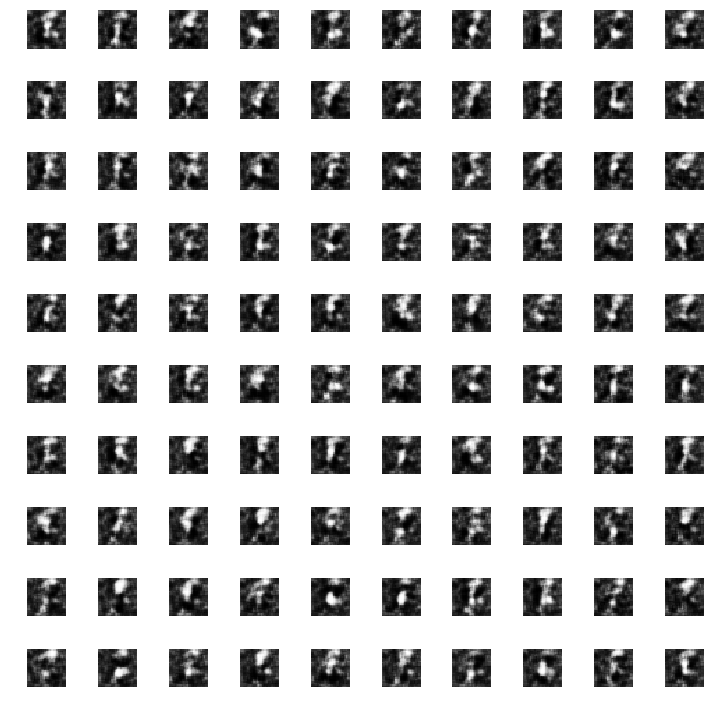

('Epoch is', 1)
('Number of batches', 234)
batch 0 g_loss : 1.399109, d_loss : 0.380339
batch 50 g_loss : 1.648893, d_loss : 0.309598
batch 100 g_loss : 1.563789, d_loss : 0.315654
batch 150 g_loss : 1.340645, d_loss : 0.355767
batch 200 g_loss : 1.397787, d_loss : 0.411602


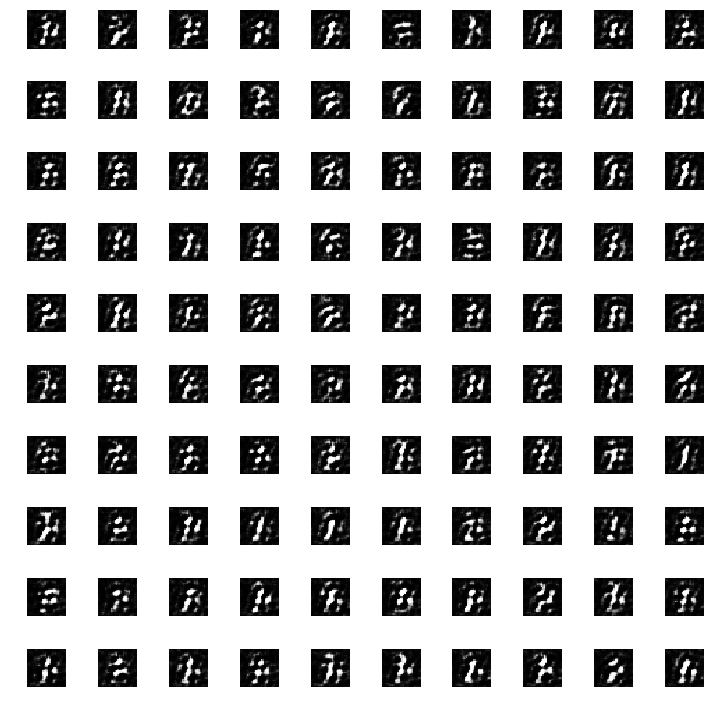

('Epoch is', 2)
('Number of batches', 234)
batch 0 g_loss : 1.262396, d_loss : 0.446549
batch 50 g_loss : 1.185026, d_loss : 0.494950
batch 100 g_loss : 1.134477, d_loss : 0.485622
batch 150 g_loss : 1.070385, d_loss : 0.508468
batch 200 g_loss : 1.102561, d_loss : 0.514012


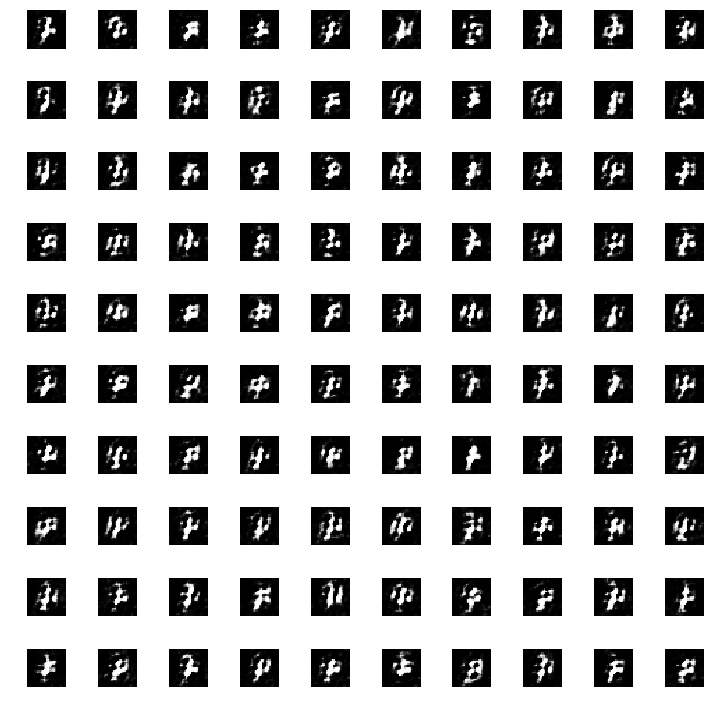

('Epoch is', 3)
('Number of batches', 234)
batch 0 g_loss : 1.012119, d_loss : 0.505449
batch 50 g_loss : 1.038325, d_loss : 0.524600
batch 100 g_loss : 1.009284, d_loss : 0.474905
batch 150 g_loss : 1.061591, d_loss : 0.510443
batch 200 g_loss : 1.054625, d_loss : 0.499604


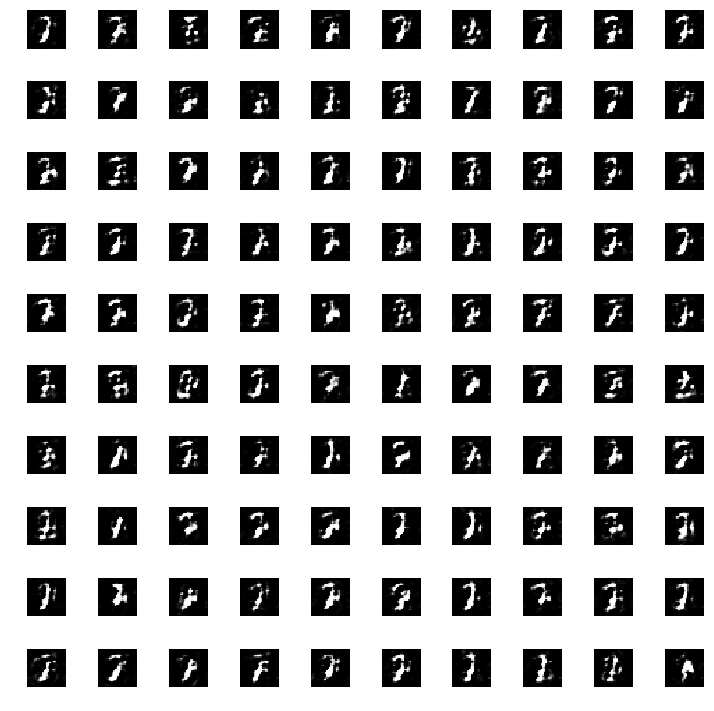

('Epoch is', 4)
('Number of batches', 234)
batch 0 g_loss : 1.131812, d_loss : 0.475737
batch 50 g_loss : 0.919870, d_loss : 0.519864
batch 100 g_loss : 1.158239, d_loss : 0.443855
batch 150 g_loss : 1.341442, d_loss : 0.470617
batch 200 g_loss : 1.435242, d_loss : 0.480858


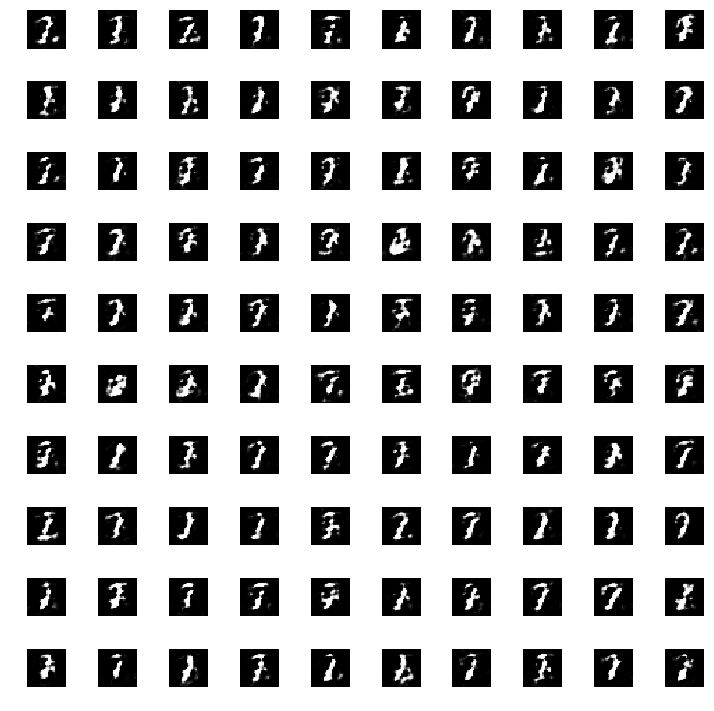

('Epoch is', 5)
('Number of batches', 234)
batch 0 g_loss : 1.551469, d_loss : 0.451334
batch 50 g_loss : 0.692604, d_loss : 0.537634
batch 100 g_loss : 1.462373, d_loss : 0.382484
batch 150 g_loss : 1.414178, d_loss : 0.406794
batch 200 g_loss : 1.483538, d_loss : 0.442573


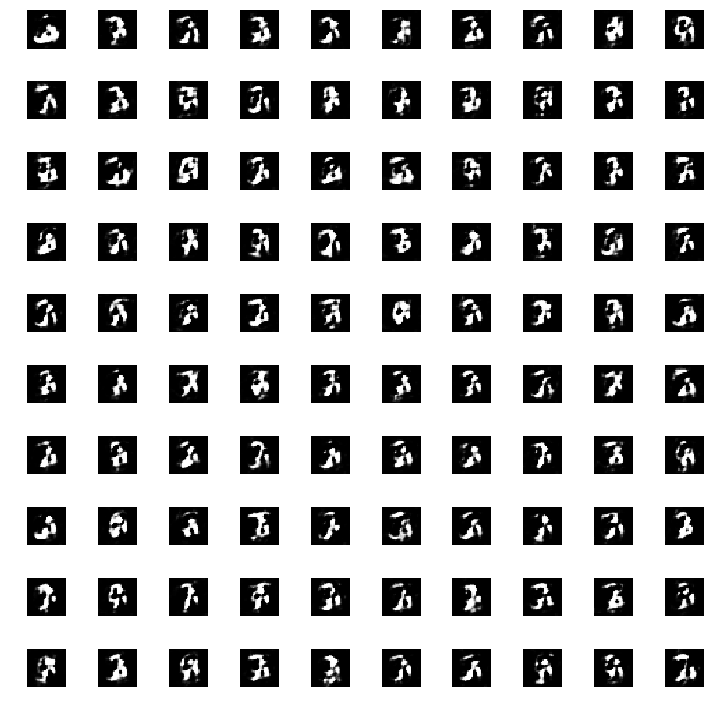

('Epoch is', 6)
('Number of batches', 234)
batch 0 g_loss : 1.538642, d_loss : 0.382384
batch 50 g_loss : 1.063000, d_loss : 0.433746
batch 100 g_loss : 1.584096, d_loss : 0.356822
batch 150 g_loss : 1.234229, d_loss : 0.355297
batch 200 g_loss : 2.028021, d_loss : 0.398634


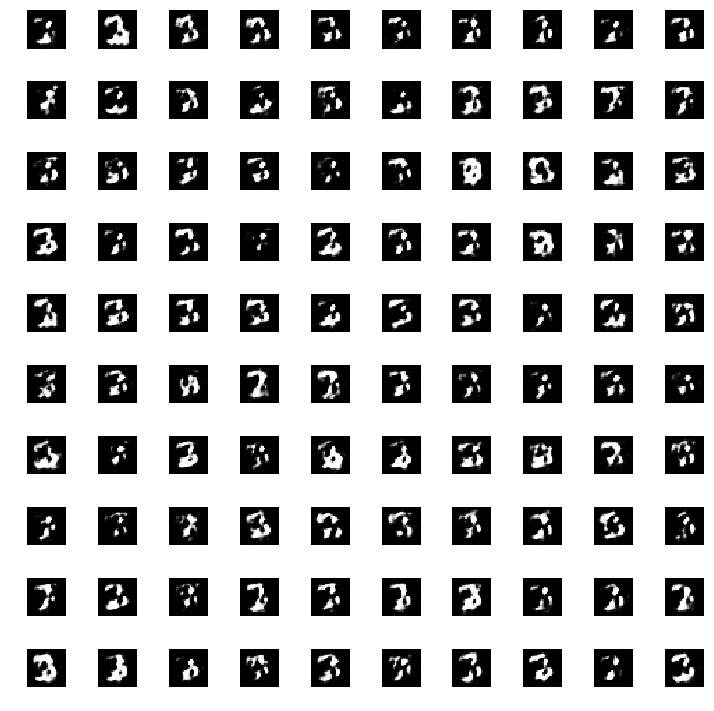

('Epoch is', 7)
('Number of batches', 234)
batch 0 g_loss : 1.653598, d_loss : 0.328407
batch 50 g_loss : 0.977731, d_loss : 0.401598
batch 100 g_loss : 2.048801, d_loss : 0.283363
batch 150 g_loss : 1.763845, d_loss : 0.276875
batch 200 g_loss : 1.471283, d_loss : 0.355741


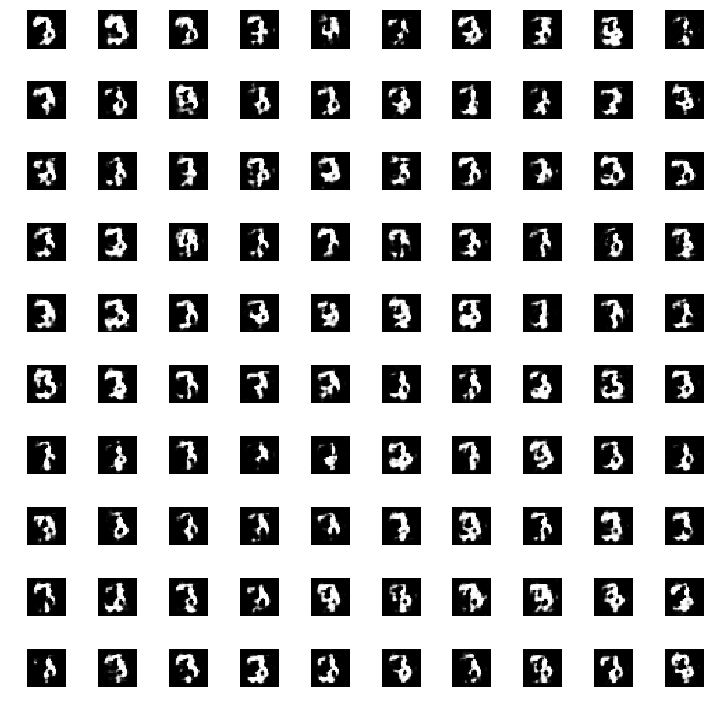

('Epoch is', 8)
('Number of batches', 234)
batch 0 g_loss : 1.596489, d_loss : 0.279939
batch 50 g_loss : 1.481307, d_loss : 0.337542
batch 100 g_loss : 2.005652, d_loss : 0.231522
batch 150 g_loss : 2.037230, d_loss : 0.291409
batch 200 g_loss : 0.933011, d_loss : 0.457920


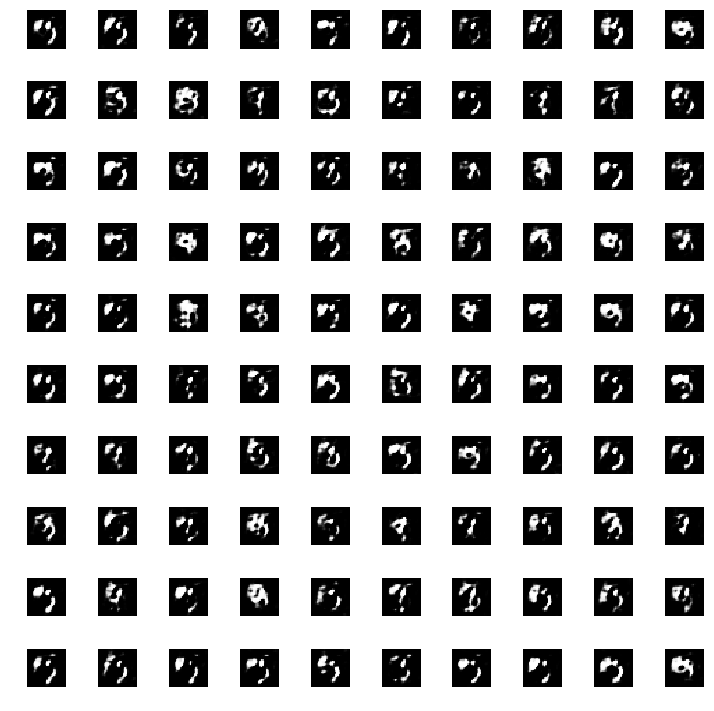

('Epoch is', 9)
('Number of batches', 234)
batch 0 g_loss : 2.543565, d_loss : 0.296781
batch 50 g_loss : 1.802838, d_loss : 0.293647
batch 100 g_loss : 3.054878, d_loss : 0.359165
batch 150 g_loss : 2.265344, d_loss : 0.354946
batch 200 g_loss : 0.917514, d_loss : 0.451033


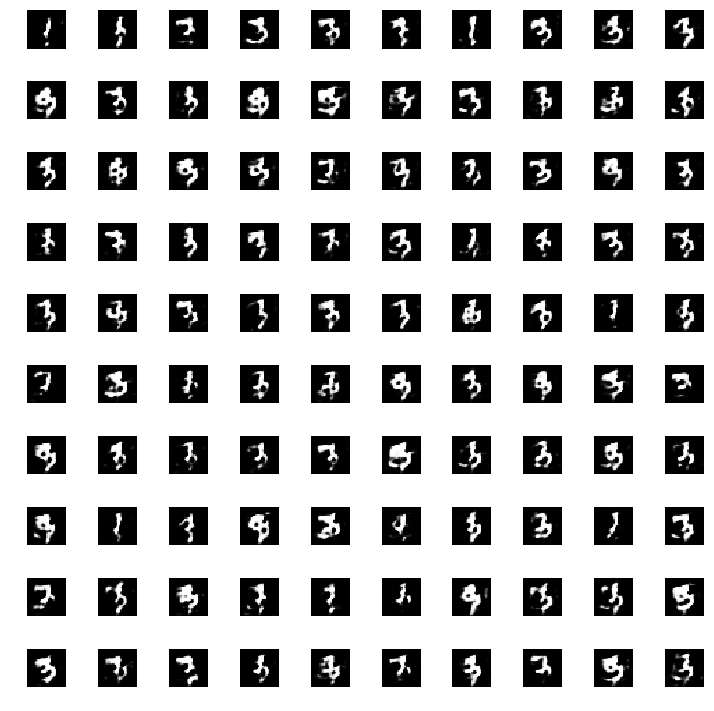

('Epoch is', 10)
('Number of batches', 234)
batch 0 g_loss : 1.763575, d_loss : 0.272677
batch 50 g_loss : 1.530276, d_loss : 0.320120
batch 100 g_loss : 2.330178, d_loss : 0.276728
batch 150 g_loss : 1.494167, d_loss : 0.323335
batch 200 g_loss : 1.704901, d_loss : 0.344396


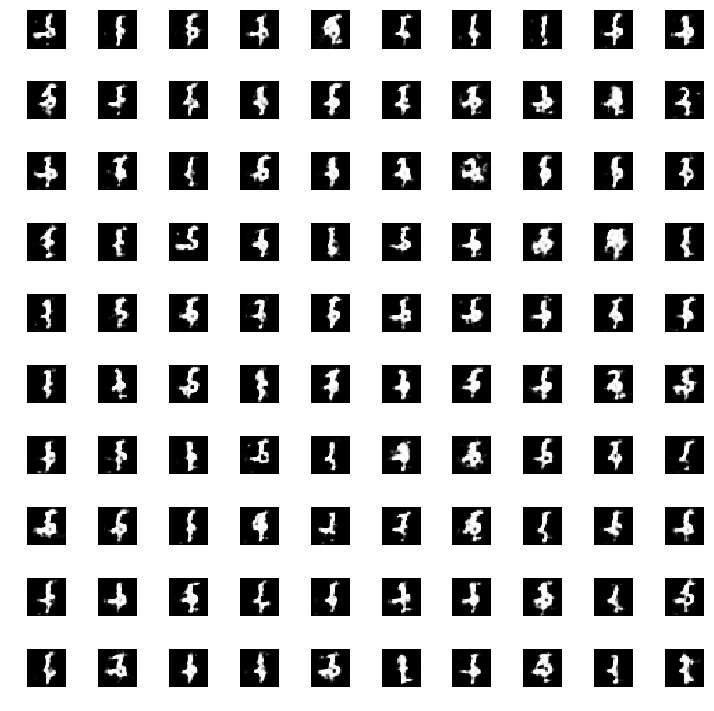

('Epoch is', 11)
('Number of batches', 234)
batch 0 g_loss : 1.722272, d_loss : 0.345026
batch 50 g_loss : 0.990762, d_loss : 0.426580
batch 100 g_loss : 1.957730, d_loss : 0.303893
batch 150 g_loss : 1.586027, d_loss : 0.351029
batch 200 g_loss : 1.583721, d_loss : 0.342032


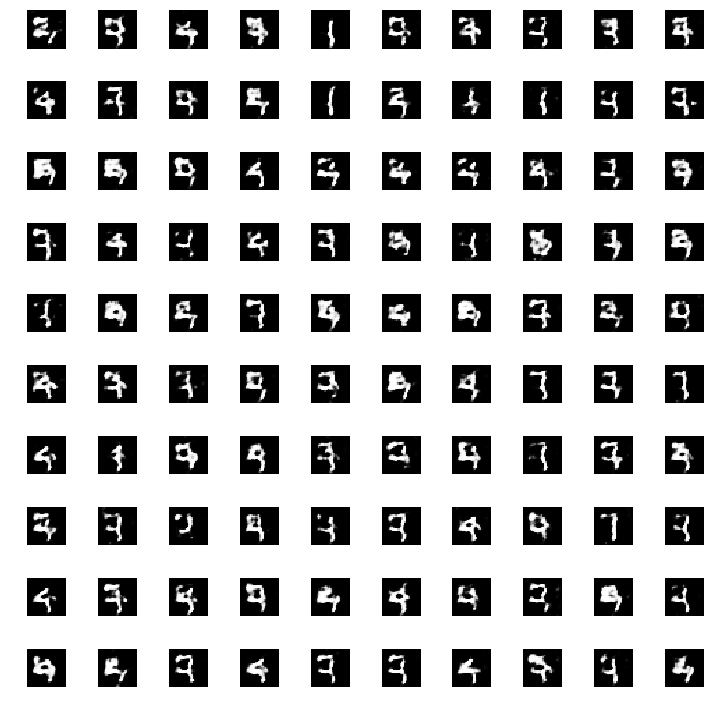

('Epoch is', 12)
('Number of batches', 234)
batch 0 g_loss : 1.662076, d_loss : 0.293959
batch 50 g_loss : 1.410852, d_loss : 0.372779
batch 100 g_loss : 1.844870, d_loss : 0.336559
batch 150 g_loss : 1.096594, d_loss : 0.416586
batch 200 g_loss : 1.430949, d_loss : 0.404029


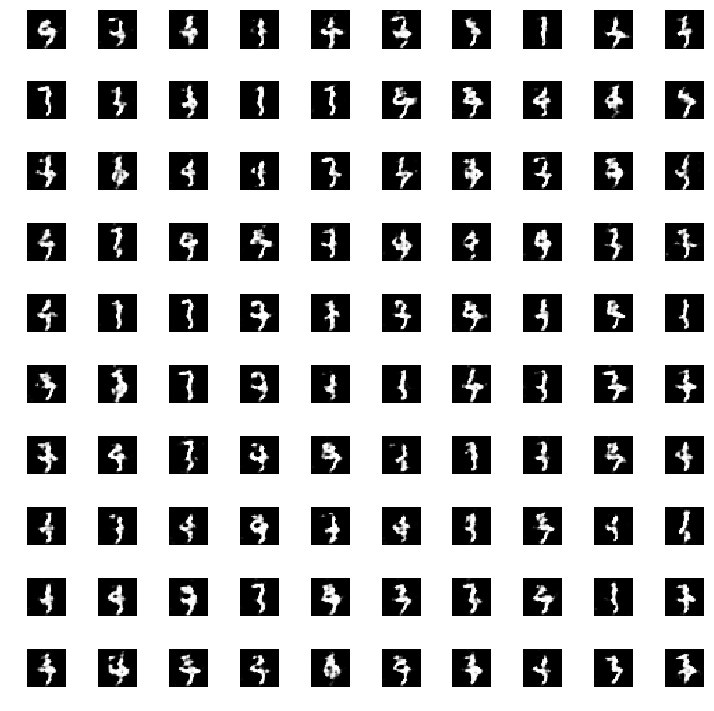

('Epoch is', 13)
('Number of batches', 234)
batch 0 g_loss : 1.570825, d_loss : 0.360523
batch 50 g_loss : 1.261002, d_loss : 0.378938
batch 100 g_loss : 1.950506, d_loss : 0.377036
batch 150 g_loss : 1.164672, d_loss : 0.391651
batch 200 g_loss : 1.264975, d_loss : 0.423728


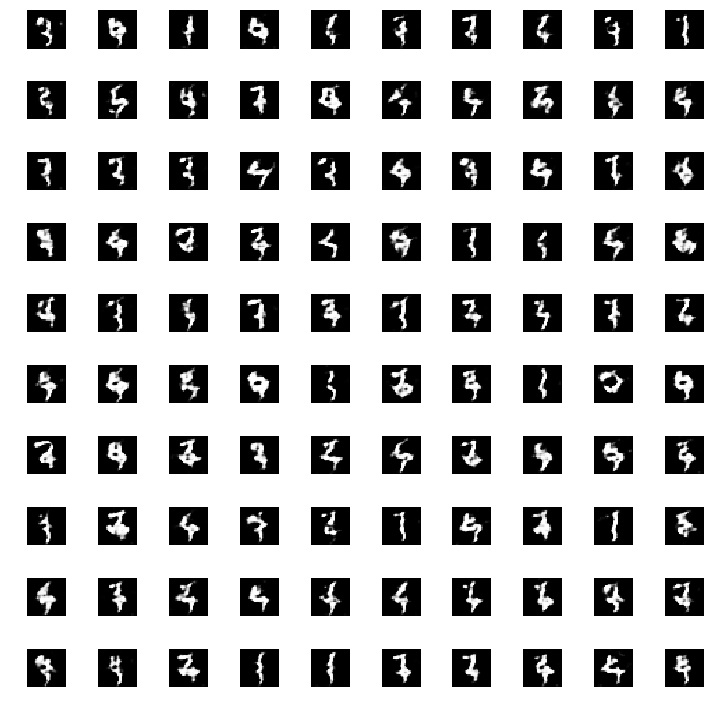

('Epoch is', 14)
('Number of batches', 234)
batch 0 g_loss : 1.586777, d_loss : 0.361540
batch 50 g_loss : 1.247322, d_loss : 0.421968
batch 100 g_loss : 1.745986, d_loss : 0.437766
batch 150 g_loss : 0.763441, d_loss : 0.547972
batch 200 g_loss : 1.198288, d_loss : 0.467670


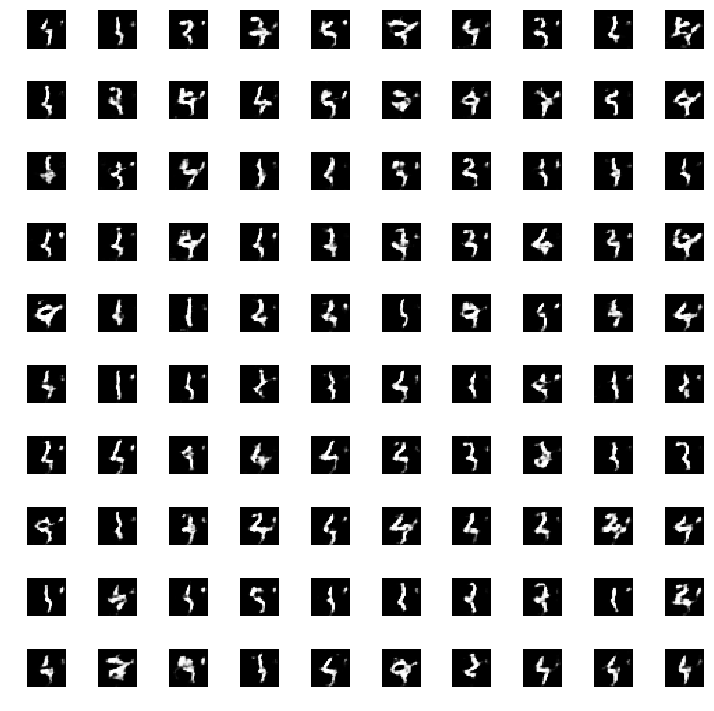

('Epoch is', 15)
('Number of batches', 234)
batch 0 g_loss : 2.486879, d_loss : 0.573254
batch 50 g_loss : 1.440734, d_loss : 0.487401
batch 100 g_loss : 1.415365, d_loss : 0.383083
batch 150 g_loss : 1.204777, d_loss : 0.401576
batch 200 g_loss : 1.314725, d_loss : 0.424105


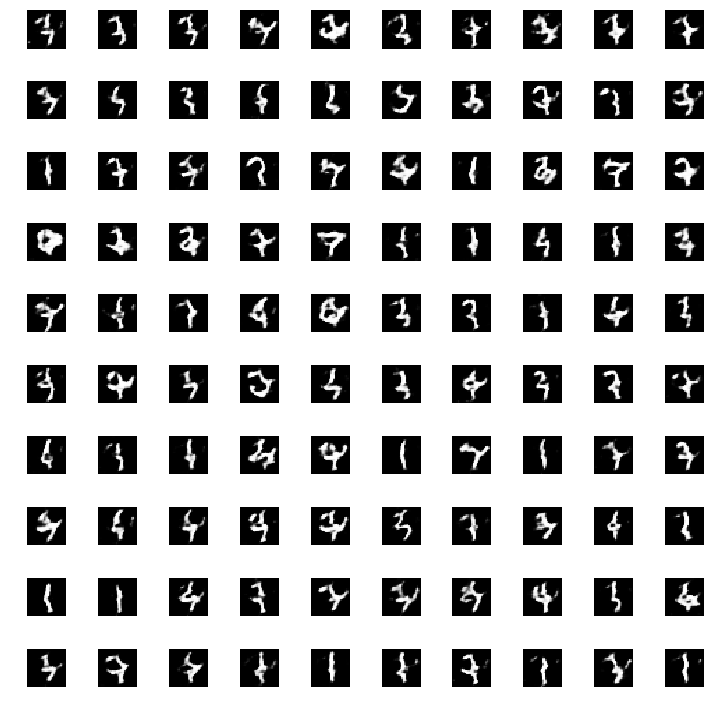

('Epoch is', 16)
('Number of batches', 234)
batch 0 g_loss : 1.927656, d_loss : 0.401875
batch 50 g_loss : 1.204716, d_loss : 0.397008
batch 100 g_loss : 1.829772, d_loss : 0.437258
batch 150 g_loss : 1.392003, d_loss : 0.429391
batch 200 g_loss : 1.758023, d_loss : 0.504033


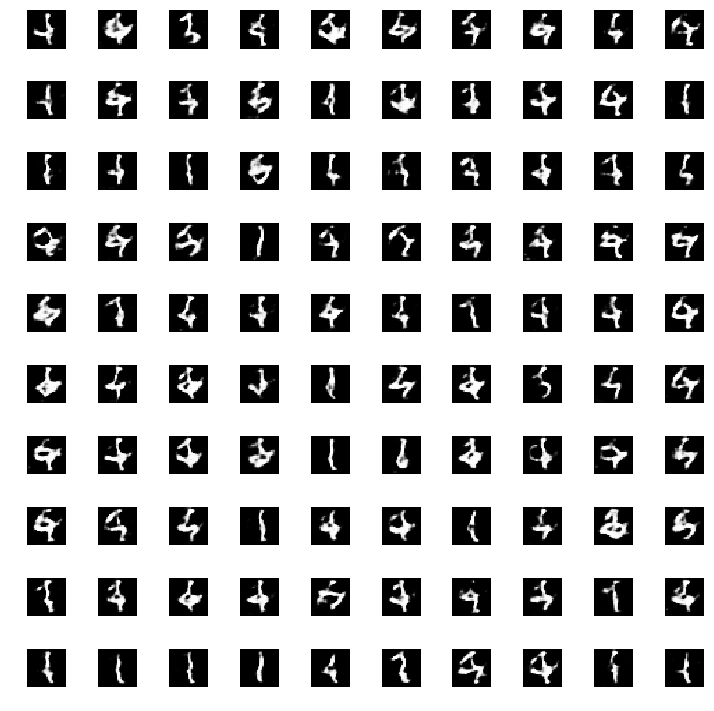

('Epoch is', 17)
('Number of batches', 234)
batch 0 g_loss : 1.774435, d_loss : 0.440035
batch 50 g_loss : 1.495538, d_loss : 0.493801
batch 100 g_loss : 2.153617, d_loss : 0.521142
batch 150 g_loss : 1.469406, d_loss : 0.367364


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, :, :, None]
X_test = X_test[:, :, :, None]

EPOCH = 20
BATCH_SIZE = 256

for EPOCH in range(100):
    print("Epoch is", EPOCH)
    print("Number of batches", int(X_train.shape[0]/BATCH_SIZE))
    for index in range(int(X_train.shape[0]/BATCH_SIZE)):
        # generate 256 fake images
        noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, 100))
        image_batch = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]
        generated_images = G.predict(noise, verbose=0)
        # 256 fake image, 256 real images
        # training discriminator
        X = np.concatenate((image_batch, generated_images))
        y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
        d_loss = D.train_on_batch(X, y)
        # frezze discriminator then training generator 
        noise = np.random.uniform(-1, 1, (BATCH_SIZE, 100))
        D.trainable = False
        g_loss = GAN.train_on_batch(noise, [1] * BATCH_SIZE)
        D.trainable = True
        if index % 50 == 0:
            print("batch %d g_loss : %f, d_loss : %f" % (index, g_loss, d_loss))
        
    try_input = np.random.rand(100, 100)
    preds = G.predict(try_input)
    plt.figure(figsize=(10,10))
    for i in range(preds.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(preds[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()